In [1]:
import requests
import pytz
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from cycler import cycler
import seaborn as sns

In [6]:
# Define the URL and query parameters
url = "https://publicationtool.jao.eu/core/api/data/referenceNetPosition"
params = {"FromUtc": "2025-01-22T23:00:00.000Z","ToUtc": "2025-01-23T23:00:00.000Z"}

try:
    response = requests.get(url, params=params, verify=False)
    response.raise_for_status()  
    data = response.json()
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")

data_list = data['data']
df = pd.DataFrame(data_list)
# Convert to Ljubljana time zone (Europe/Ljubljana)
df['dateTimeUtc'] = pd.to_datetime(df['dateTimeUtc'], utc=True)
df['dateTimeUtc'] = df['dateTimeUtc'].dt.tz_convert(pytz.timezone('Europe/Ljubljana'))
df['dateTimeUtc'] = df['dateTimeUtc'].dt.tz_localize(None)
df = df.drop(df.columns[0], axis=1) # Nepotreben 'id' stolpec
# df
# df.head(1)

c:\Users\Jaka\anaconda3\lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicationtool.jao.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


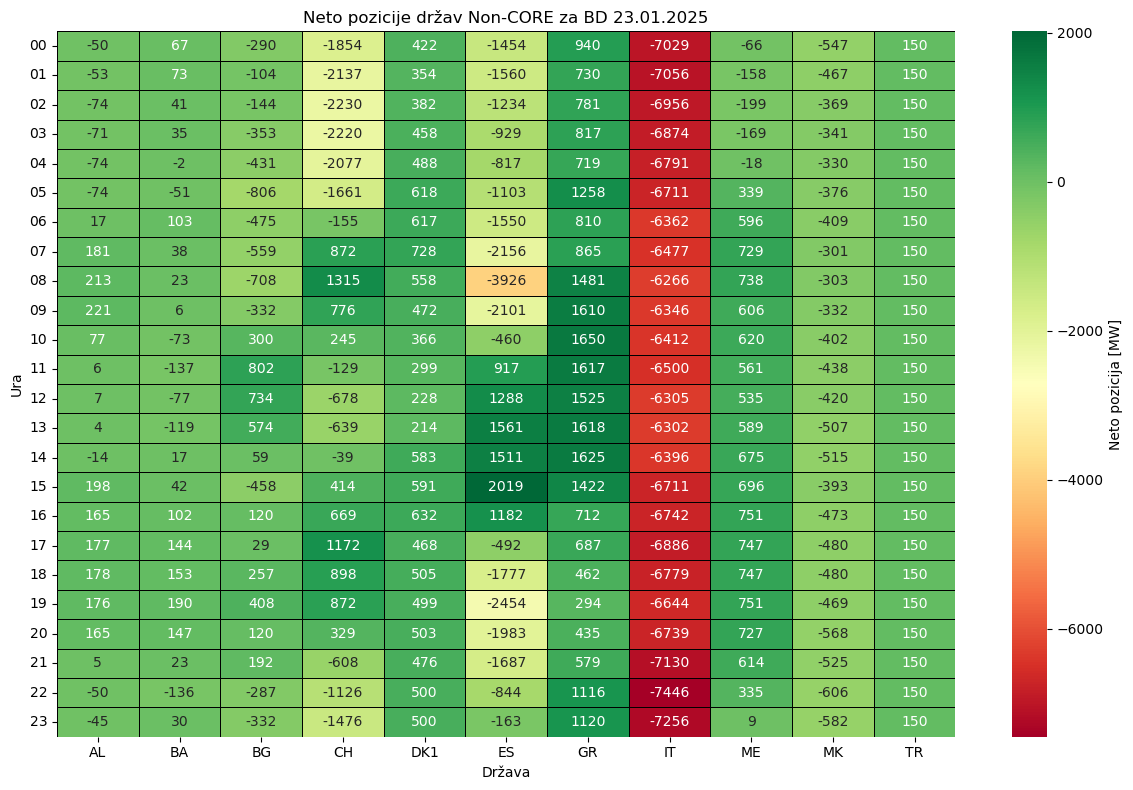

In [7]:
columns_to_extract = [df.columns[0]] + [col for col in df.columns if col.startswith('globalNetPosition')]
df_net_pos = df[columns_to_extract]
df_net_pos.columns = [col.replace('globalNetPosition_', '') for col in df_net_pos.columns]
columns_to_delete = list(df_net_pos.columns[-2:]) + list(df_net_pos.columns[-5:-3])
df_net_pos = df_net_pos.drop(columns=columns_to_delete)

date_str = df['dateTimeUtc'].iloc[0].strftime('%d.%m.%Y')
df_net_pos['dateTimeUtc'] = pd.to_datetime(df_net_pos['dateTimeUtc'])
df_net_pos['Hour_Minute'] = df_net_pos['dateTimeUtc'].dt.strftime('%H')
df_net_pos.drop(columns=["dateTimeUtc"], inplace=True)
df_net_pos.set_index('Hour_Minute', inplace=True)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_net_pos, cmap='RdYlGn', annot=True, fmt='.0f',linecolor='black', linewidths=0.5, cbar_kws={'label': 'Neto pozicija [MW]'})
# Configure plot
plt.title(f'Neto pozicije držav Non-CORE za BD {date_str}')
plt.ylabel('Ura')
plt.xlabel('Država')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()